In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import seaborn as sns
import plotly.express as px


In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to spotify-2023.sqlite
#DONT RUN THIS UNLESS WE HAVE THE SQL UPDATED
engine = create_engine("sqlite:///Resources/spotify-2023.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)
base.classes.keys()

[]

In [6]:
#import csv
spotify_2023_data = Path("Resources/spotify_2023.csv")

In [7]:
#show headers
spotify_2023_df = pd.read_csv(spotify_2023_data)
spotify_2023_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


In [8]:
#list of columns
spotify_2023_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

In [9]:
spotify_2023_df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

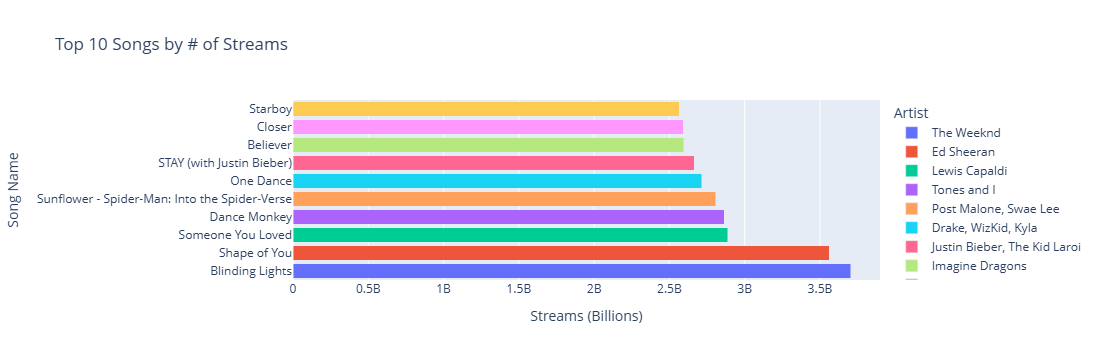

In [12]:
#create visualization for top 10-25 songs with hover of track name, artist, and # of song streams
# Fufills requirement your final visualization should ideally include at least three views
import plotly.express as px

# Create a DataFrame for the top 10 songs by streams
top_songs_df = spotify_2023_df.groupby(['track_name', 'artist(s)_name'])['streams'].sum().reset_index()
top_songs_df = top_songs_df.sort_values(by='streams', ascending=False).head(10)  # Adjust to 10-25 songs

# Create a Plotly bar chart with hover functionality
fig = px.bar(top_songs_df, 
             x='streams', 
             y='track_name', 
             color='artist(s)_name', 
             hover_data={'track_name': True, 'artist(s)_name': True, 'streams': True},
             labels={'streams': 'Streams (Billions)', 'track_name': 'Song Name', 'artist(s)_name': 'Artist'},
             title="Top 10 Songs by # of Streams")

# Show the plot
fig.update_layout(barmode='stack', showlegend=True)
fig.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_27136\2435919972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='released_year', y='streams', data=streams_by_year, palette='viridis')


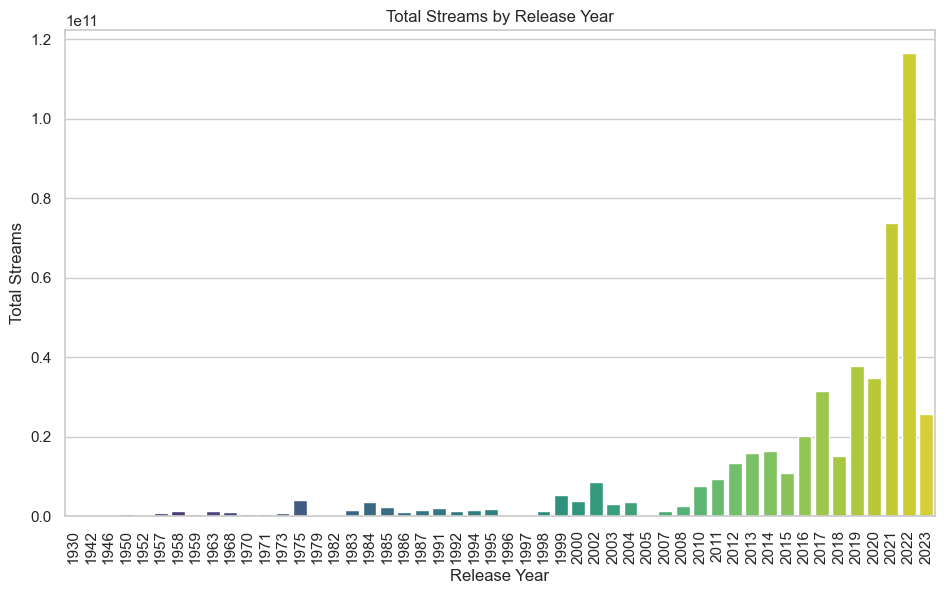

In [13]:
#create visualization release year vs number of streams
# Fufills requirement your final visualization should ideally include at least three views
#LingB
streams_by_year = spotify_2023_df.groupby('released_year')['streams'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='released_year', y='streams', data=streams_by_year, palette='viridis')
plt.title("Total Streams by Release Year")
plt.xlabel('Release Year')
plt.ylabel('Total Streams')
plt.xticks(rotation=90)
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_27136\2922386482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Playlist Count', data=platform_comparison, palette='viridis')


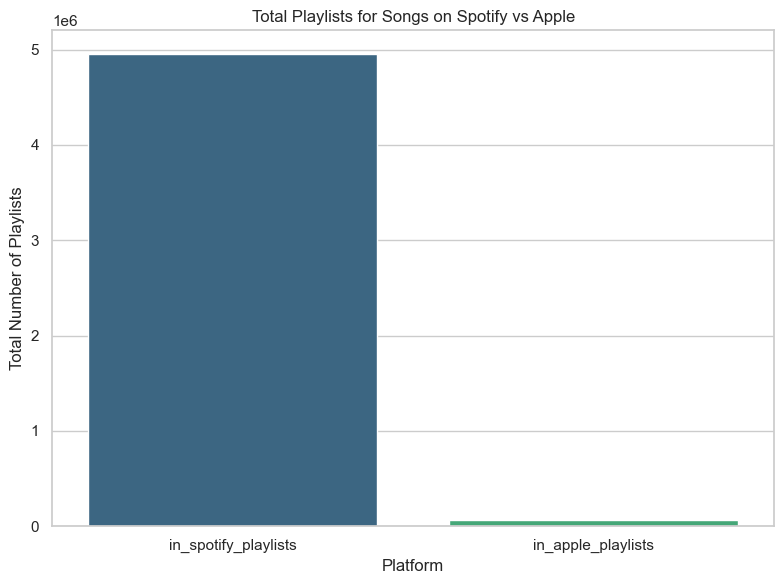

In [16]:
#create visualization of spotify vs apple playlist(s)
# Fufills requirement your final visualization should ideally include at least three views
playlist_comparison = spotify_2023_df.groupby('track_name').agg({
    'in_spotify_playlists': 'sum',
    'in_apple_playlists': 'sum',
}).reset_index()
platform_comparison = playlist_comparison[['in_spotify_playlists', 'in_apple_playlists']].sum().reset_index()
platform_comparison.columns = ['Platform', 'Playlist Count']

plt.figure(figsize=(8,6))
sns.barplot(x='Platform', y='Playlist Count', data=platform_comparison, palette='viridis')
plt.title("Total Playlists for Songs on Spotify vs Apple")
plt.xlabel('Platform')
plt.ylabel('Total Number of Playlists')
plt.tight_layout()
plt.show()

#Probably better as a pychart

In [ ]:
#create dropdown menu with filters - by (decide on this) top 10 streams(???)
#Fulfills requirement Your project must include some level of user-driven interaction